**Put your name and student ID here.**

**Name: Mohammad Jawad Nayosh**

**Student ID: T01242238**

**ANLY 6110 - Data Analytics II**

**Homework - Unsupervised Learning**

We will use the dataset `unsupervised.csv` for an unsupervised learning analysis.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd "/content/drive/MyDrive/ANLY 6110_ II/Module 6 Dimensionality Reduction"

/content/drive/MyDrive/ANLY 6110_ II/Module 6 Dimensionality Reduction


In [6]:
%pwd

'/content/drive/MyDrive/ANLY 6110_ II/Module 6 Dimensionality Reduction'

In [7]:
%ls

HW11_Dimensionality_Reduction_finisher.ipynb  unsupervised.csv
HW12_Unsupervised_Learning_Finisher.ipynb     wine.csv


## Q1. (0.5 points)

Load the dataset from the `unsupervised.csv` file into a DataFrame.

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>X1</th>
      <th>X2</th>
      <th>X3</th>
      <th>label</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>5.358902</td>
      <td>1.314796</td>
      <td>10.088034</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>-2.047517</td>
      <td>1.548564</td>
      <td>-4.141415</td>
      <td>5</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2.071804</td>
      <td>1.619892</td>
      <td>-7.937736</td>
      <td>1</td>
    </tr>
    <tr>
      <th>3</th>
      <td>-7.644881</td>
      <td>-1.977263</td>
      <td>-0.938515</td>
      <td>2</td>
    </tr>
    <tr>
      <th>4</th>
      <td>-7.262086</td>
      <td>-5.065811</td>
      <td>-0.328388</td>
      <td>2</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>5995</th>
      <td>1.295738</td>
      <td>2.490616</td>
      <td>-5.309260</td>
      <td>1</td>
    </tr>
    <tr>
      <th>5996</th>
      <td>-0.576419</td>
      <td>1.210544</td>
      <td>-6.425405</td>
      <td>1</td>
    </tr>
    <tr>
      <th>5997</th>
      <td>4.158442</td>
      <td>-1.343437</td>
      <td>-10.017688</td>
      <td>3</td>
    </tr>
    <tr>
      <th>5998</th>
      <td>6.956277</td>
      <td>1.951808</td>
      <td>-12.995420</td>
      <td>3</td>
    </tr>
    <tr>
      <th>5999</th>
      <td>-8.507905</td>
      <td>-2.698831</td>
      <td>-2.000908</td>
      <td>2</td>
    </tr>
  </tbody>
</table>
<p>6000 rows × 4 columns</p>
</div>

In [9]:
# Provide your answer here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('unsupervised.csv')
df

X1        X2         X3  label
0     5.358902  1.314796  10.088034      0
1    -2.047517  1.548564  -4.141415      5
2     2.071804  1.619892  -7.937736      1
3    -7.644881 -1.977263  -0.938515      2
4    -7.262086 -5.065811  -0.328388      2
...        ...       ...        ...    ...
5995  1.295738  2.490616  -5.309260      1
5996 -0.576419  1.210544  -6.425405      1
5997  4.158442 -1.343437 -10.017688      3
5998  6.956277  1.951808 -12.995420      3
5999 -8.507905 -2.698831  -2.000908      2

[6000 rows x 4 columns]

## Q2. (1.5 points)

Use `matplotlib`'s `ax.scatter()` to visualize the dataset as a 3D scatter plot. Color each point differently based on the column `label`.

The colors or colormaps do not need to match exactly those in the following figure. You should get a figure similar to this:

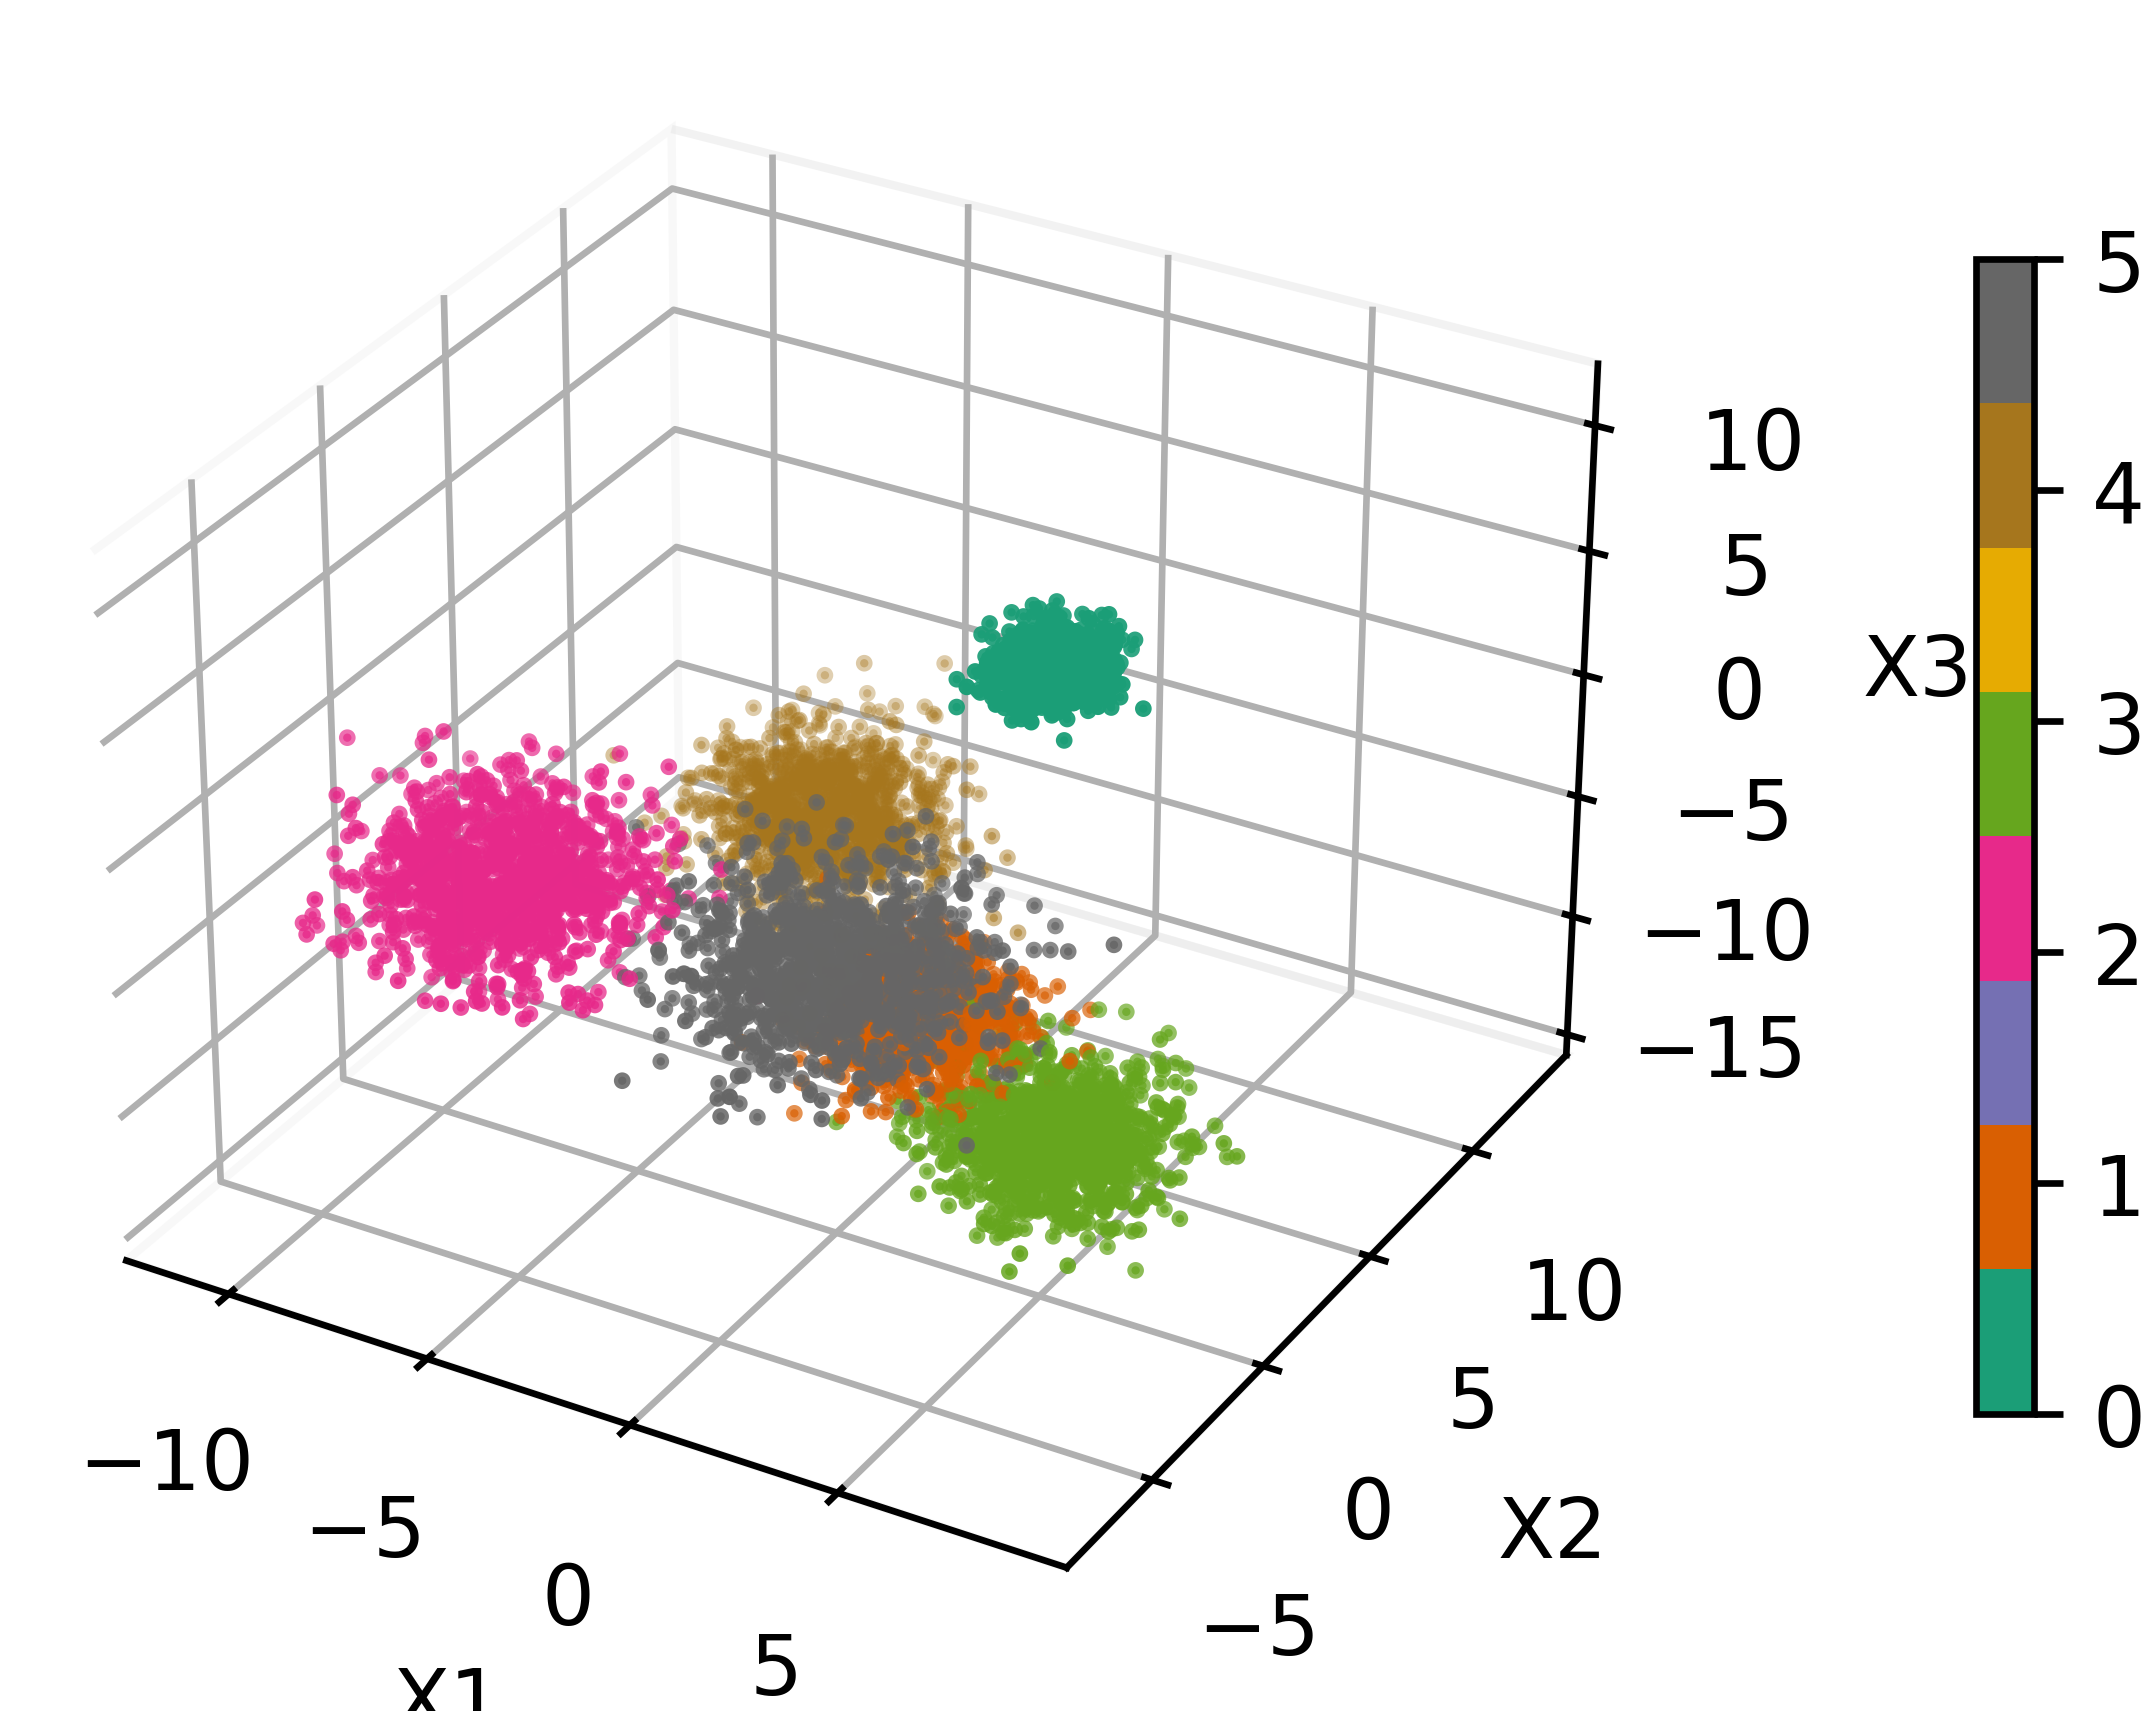

In [17]:
df.columns

Index(['X1', 'X2', 'X3', 'label'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

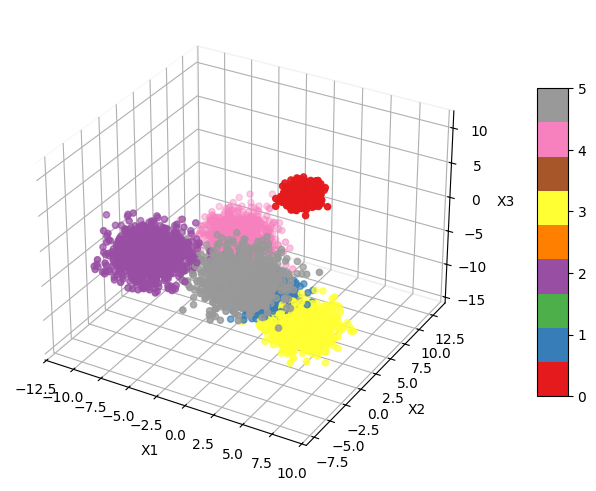

In [32]:
# Provide your answer here.

fig = plt.figure(figsize=(8,8))

ax1 = plt.subplot(1,1,1, projection="3d")

sc1 = ax1.scatter(df["X1"],df["X2"],df["X3"], c=df["label"], cmap=plt.cm.Set1)
cb1 = plt.colorbar(sc1, shrink=0.5, aspect=10, pad=0.1)

ax1.set_xlabel("X1")
ax1.set_ylabel("X2")
ax1.set_zlabel("X3")

ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False
plt.show

## Q3. (1 point)

Get all features and save them in `X`. The features include all columns except the `label` column.

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>X1</th>
      <th>X2</th>
      <th>X3</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>5.358902</td>
      <td>1.314796</td>
      <td>10.088034</td>
    </tr>
    <tr>
      <th>1</th>
      <td>-2.047517</td>
      <td>1.548564</td>
      <td>-4.141415</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2.071804</td>
      <td>1.619892</td>
      <td>-7.937736</td>
    </tr>
    <tr>
      <th>3</th>
      <td>-7.644881</td>
      <td>-1.977263</td>
      <td>-0.938515</td>
    </tr>
    <tr>
      <th>4</th>
      <td>-7.262086</td>
      <td>-5.065811</td>
      <td>-0.328388</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>5995</th>
      <td>1.295738</td>
      <td>2.490616</td>
      <td>-5.309260</td>
    </tr>
    <tr>
      <th>5996</th>
      <td>-0.576419</td>
      <td>1.210544</td>
      <td>-6.425405</td>
    </tr>
    <tr>
      <th>5997</th>
      <td>4.158442</td>
      <td>-1.343437</td>
      <td>-10.017688</td>
    </tr>
    <tr>
      <th>5998</th>
      <td>6.956277</td>
      <td>1.951808</td>
      <td>-12.995420</td>
    </tr>
    <tr>
      <th>5999</th>
      <td>-8.507905</td>
      <td>-2.698831</td>
      <td>-2.000908</td>
    </tr>
  </tbody>
</table>
<p>6000 rows × 3 columns</p>
</div>

In [ ]:
# Provide your answer here.

In [33]:
X = df.drop("label", axis=1)
X

X1        X2         X3
0     5.358902  1.314796  10.088034
1    -2.047517  1.548564  -4.141415
2     2.071804  1.619892  -7.937736
3    -7.644881 -1.977263  -0.938515
4    -7.262086 -5.065811  -0.328388
...        ...       ...        ...
5995  1.295738  2.490616  -5.309260
5996 -0.576419  1.210544  -6.425405
5997  4.158442 -1.343437 -10.017688
5998  6.956277  1.951808 -12.995420
5999 -8.507905 -2.698831  -2.000908

[6000 rows x 3 columns]

## Q4. (1.5 points)

Use `sklearn.preprocessing.StandardScaler` to scale `X` and save it as `X_scaled`.

You should get a similar answer to the following.

```text
array([[ 1.15589449,  0.02162923,  2.20610205],
       [-0.43576088,  0.08240564, -0.04914698],
       [ 0.44948997,  0.10094982, -0.65083228],
       ...,
       [ 0.8979132 , -0.66947149, -0.98048731],
       [ 1.49917391,  0.18724281, -1.45243307],
       [-1.82411241, -1.02185341,  0.29010556]])
```

In [ ]:
# Provide your answer here.

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.15589449,  0.02162923,  2.20610205],
       [-0.43576088,  0.08240564, -0.04914698],
       [ 0.44948997,  0.10094982, -0.65083228],
       ...,
       [ 0.8979132 , -0.66947149, -0.98048731],
       [ 1.49917391,  0.18724281, -1.45243307],
       [-1.82411241, -1.02185341,  0.29010556]])

## Q5. (3.5 points)

Use `sklearn.cluster.KMeans` to build two KMeans models with `n_clusters` parameters set to 3 and 6, respectively. (1.5 points)

Visualize the predictions of the two models. (2 points)

The colors or colormaps do not need to match exactly those in the following figure. You should get a figure similar to this:

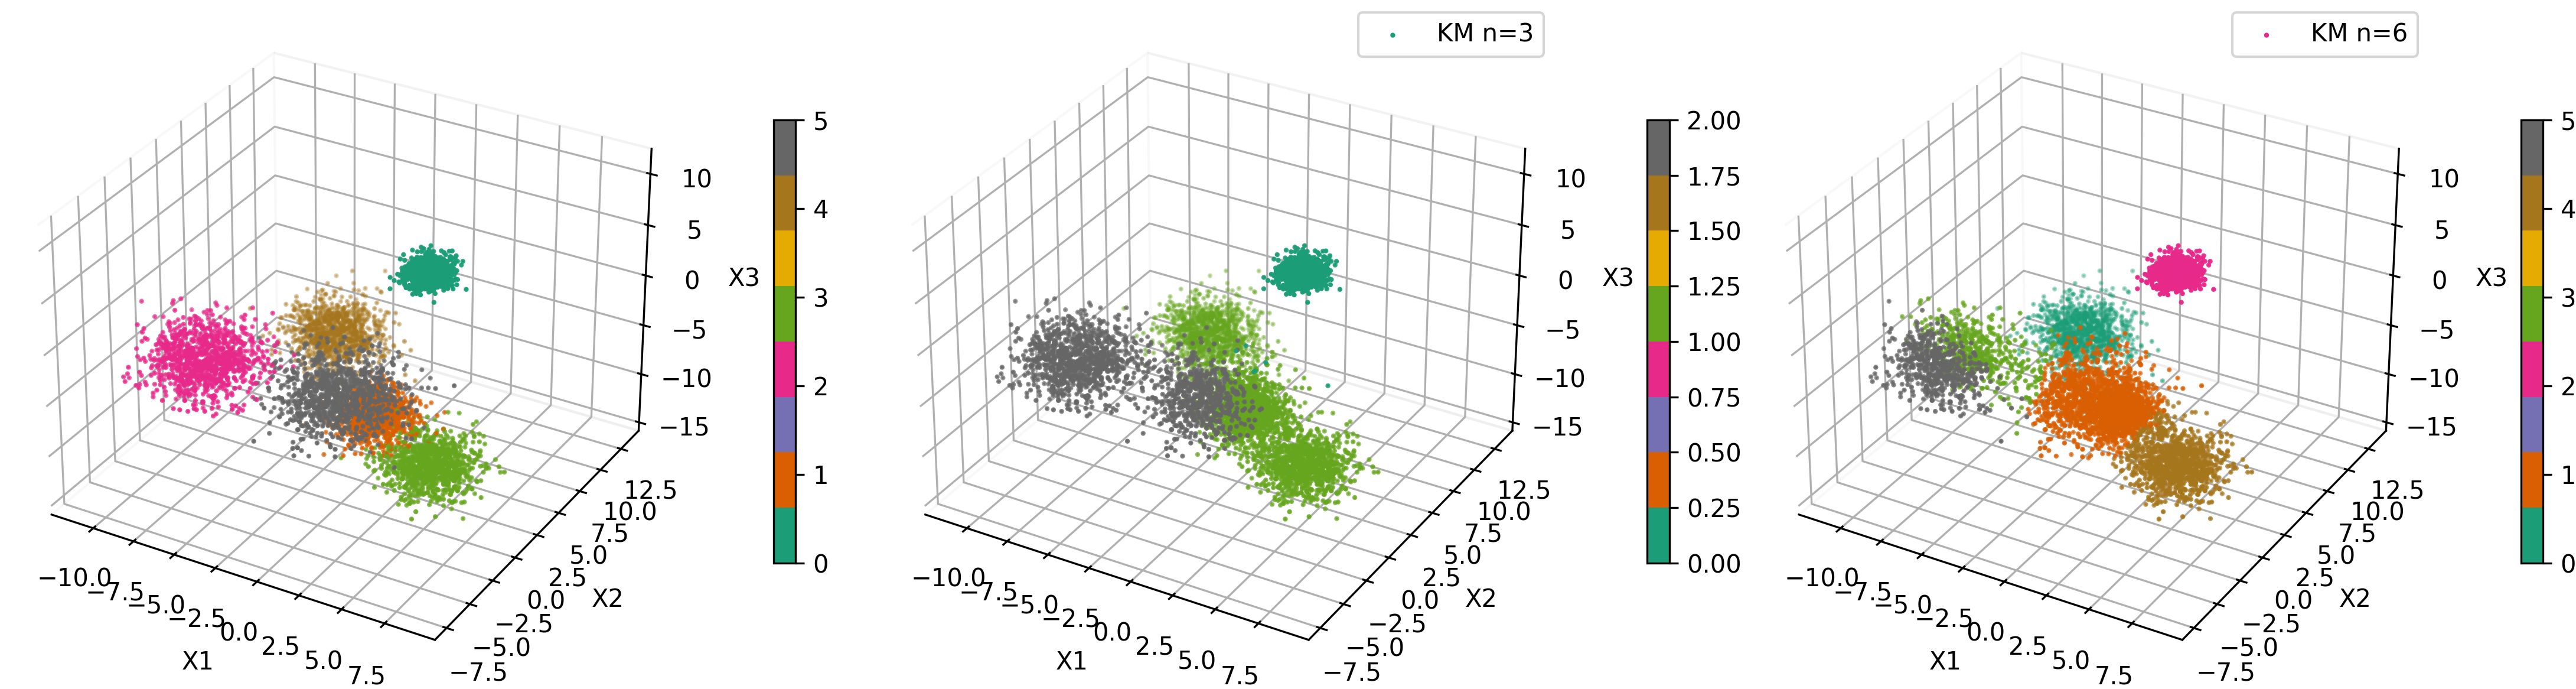

In [ ]:
# Provide your answer here.

In [35]:
from sklearn.cluster import KMeans


In [36]:
X

X1        X2         X3
0     5.358902  1.314796  10.088034
1    -2.047517  1.548564  -4.141415
2     2.071804  1.619892  -7.937736
3    -7.644881 -1.977263  -0.938515
4    -7.262086 -5.065811  -0.328388
...        ...       ...        ...
5995  1.295738  2.490616  -5.309260
5996 -0.576419  1.210544  -6.425405
5997  4.158442 -1.343437 -10.017688
5998  6.956277  1.951808 -12.995420
5999 -8.507905 -2.698831  -2.000908

[6000 rows x 3 columns]

In [37]:
km1=KMeans(n_clusters=3)
km2=KMeans(n_clusters=6)


In [38]:
km1.fit(X)
km2.fit(X)

KMeans(n_clusters=6)

In [39]:
km1.predict(X)

array([0, 1, 2, ..., 2, 2, 1], dtype=int32)

<function matplotlib.pyplot.show(close=None, block=None)>

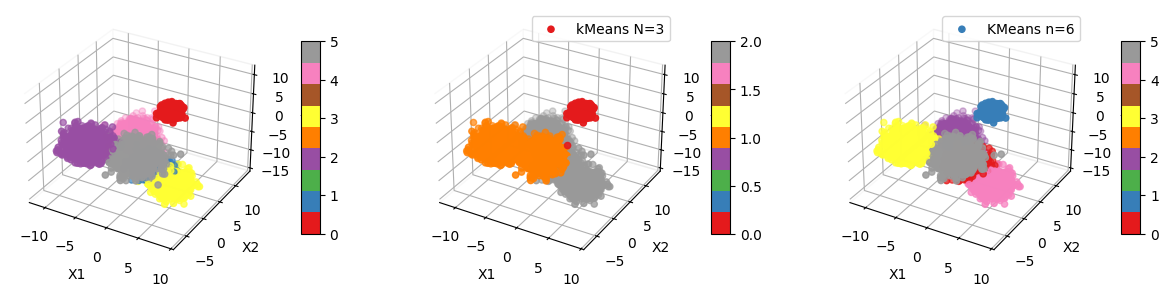

In [49]:
fig = plt.figure(figsize=(15,5))

ax1 = plt.subplot(1,3,1, projection="3d")

sc1 = ax1.scatter(df["X1"],df["X2"],df["X3"], c=df["label"], cmap=plt.cm.Set1)
cb1 = plt.colorbar(sc1, shrink=0.5, aspect=10, pad=0.1)

ax1.set_xlabel("X1")
ax1.set_ylabel("X2")
ax1.set_zlabel("X3")

ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False

#km1
ax1 = plt.subplot(1,3,2, projection="3d")
sc1 = ax1.scatter(df["X1"],df["X2"],df["X3"], c=km1.predict(X), cmap=plt.cm.Set1, label="kMeans N=3")
cb1 = plt.colorbar(sc1, shrink=0.5, aspect=10, pad=0.1)

ax1.set_xlabel("X1")
ax1.set_ylabel("X2")
ax1.set_zlabel("X3")

ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False

plt.legend()

#km2
ax1 = plt.subplot(1,3,3, projection="3d")
sc1 = ax1.scatter(df["X1"],df["X2"],df["X3"], c=km2.predict(X), cmap=plt.cm.Set1,label="KMeans n=6")
cb1 = plt.colorbar(sc1, shrink=0.5, aspect=10, pad=0.1)

ax1.set_xlabel("X1")
ax1.set_ylabel("X2")
ax1.set_zlabel("X3")

ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False

plt.legend()

plt.show

## Q6. (1 point)

Based on the prediction results, comment on the two KMeans models. Are they effective? Why or why not? Why are there three groups in one model and six groups in the other? What is the difference between KMeans models and classification models?

Q6 Answer:

Effectiveness:

To assess the effectiveness of the km1 (3 clusters) and km2 (6 clusters) models, we need to compare their predictions to the original labels in the df["label"] column.

Visual Comparison: We need to have a close look at the three scatter plots generated above. Since the clusters identified by km1 and km2 are clolsely aligned with the orgiginal data (firt plot), we can say that models are likely effective.
Consider the Context: Effectiveness also depends on the specific problem we're trying to solve. For example, if our goal is to broadly categorize data points into a few major groups, km1 might be more suitable. If we need a more fine-grained segmentation, km2 with its 6 clusters might be preferred.

Why 3 and 6 Clusters?

Clustering data or using two different numbers of clusters (3 and 6) allows for a comparison of the results and potentially insights into the natural groupings within the data. Sometimes, the choice of the number of clusters is influenced by prior knowledge or assumptions about the data. For instance, if we expect the data to have around 6 distinct categories, you would set n_clusters to 6.

What is the difference between KMeans models and classification models?

KMeans (Clustering)
Unsupervised Learning: KMeans doesn't rely on pre-labeled data; it explores the data itself to identify patterns and form clusters.
Unlabeled Input: It works with datasets where data points don't have assigned categories or groups.
Discovery of Groups: The primary goal is to uncover inherent groupings or structures within the data based on similarities between data points.
Evaluation through Visualization and Metrics: We often assess KMeans results by visually inspecting the clusters and using metrics to measure cluster quality.

Supervised Learning:
Classification models learn from labeled data, meaning each data point has a known category or class assigned to it.
Labeled Input: They require datasets where data points are already categorized.
Prediction of Classes: The main objective is to build a model that can accurately predict the class or group of new, unseen data points.
Evaluation with Prediction Performance: Classification models are evaluated based on how well they predict classes, using metrics like accuracy, precision, recall, and F1-score.

Genarlly speaking:
KMeans is about exploration and finding hidden structures in data without any prior knowledge of the groups.
Classification is about learning from known examples to make predictions about new instances.

## Q7. (4 points)

Use `sklearn.cluster.DBSCAN` to build four DBSCAN models, setting the `eps` parameter to 0.2, 0.4, 0.8, and 1, respectively. (2 points)

Visualize the predictions of each of the four models. (2 points)

The colors or colormaps do not need to match exactly those shown in the following figure, but your resulting figure should be similar to it.

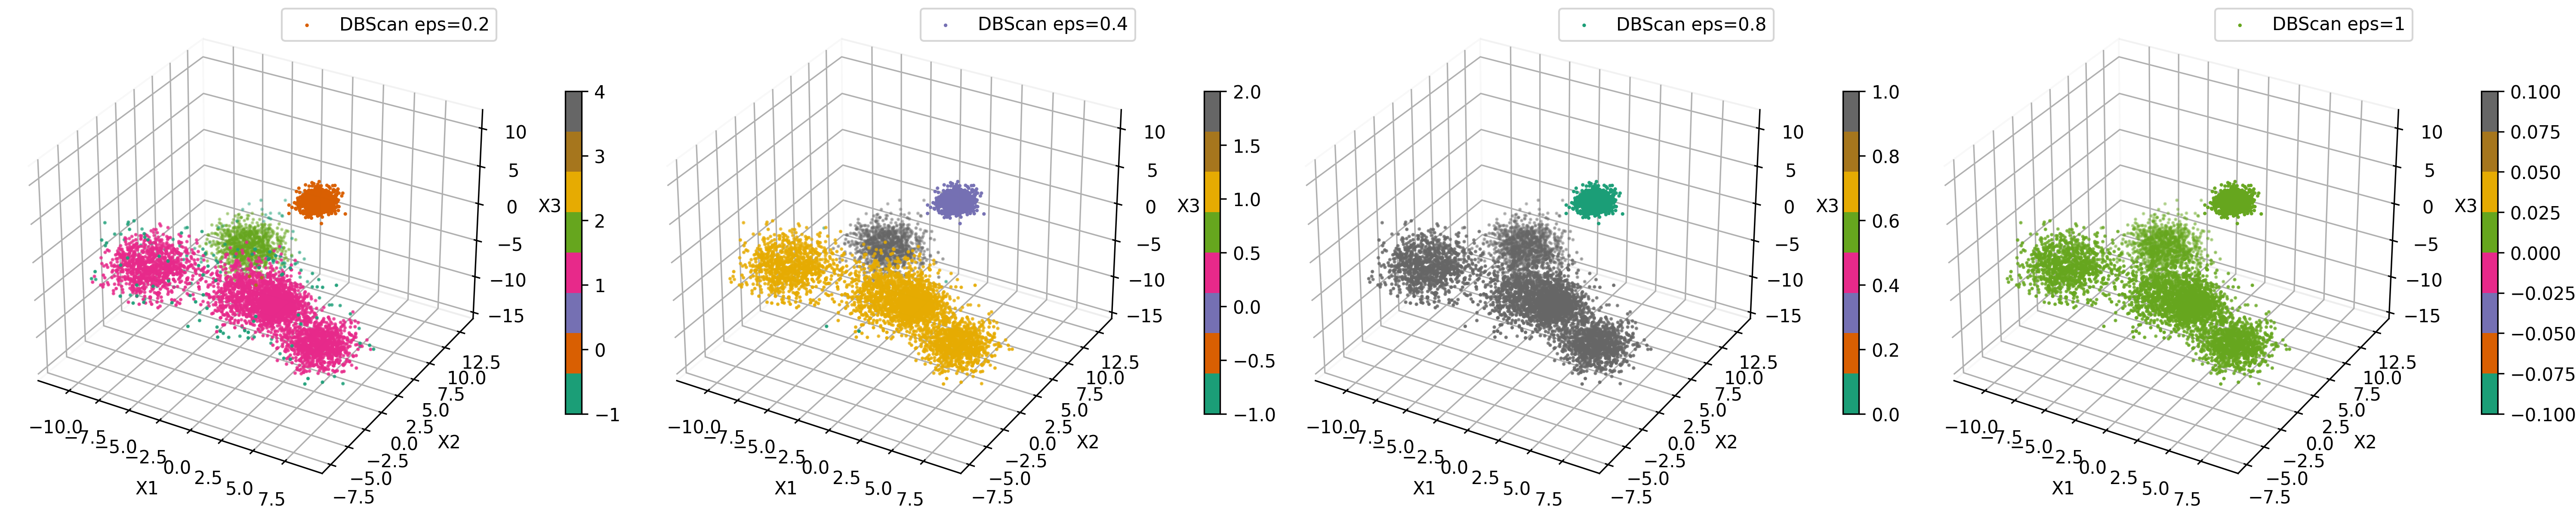

<function matplotlib.pyplot.show(close=None, block=None)>

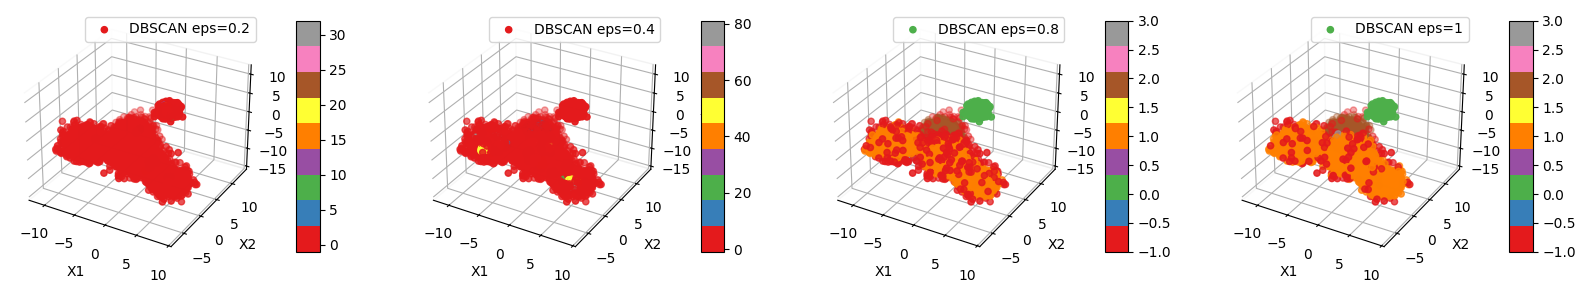

In [55]:
# Provide your answer here.

from sklearn.cluster import DBSCAN

dc1 = DBSCAN(eps=0.2)
dc2 = DBSCAN(eps=0.4)
dc3 = DBSCAN(eps=0.8)
dc4 = DBSCAN(eps=1)

dc1.fit(X)
dc2.fit(X)
dc3.fit(X)
dc4.fit(X)

fig = plt.figure(figsize=(20,6))

ax1 = plt.subplot(1,4,1, projection="3d")

sc1 = ax1.scatter(df["X1"],df["X2"],df["X3"], c=dc1.labels_, cmap=plt.cm.Set1, label="DBSCAN eps=0.2")
cb1 = plt.colorbar(sc1, shrink=0.5, aspect=10, pad=0.1)
plt.legend()

ax1.set_xlabel("X1")
ax1.set_ylabel("X2")
ax1.set_zlabel("X3")

ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False

#km1
ax1 = plt.subplot(1,4,2, projection="3d")
sc1 = ax1.scatter(df["X1"],df["X2"],df["X3"], c=dc2.labels_, cmap=plt.cm.Set1, label="DBSCAN eps=0.4")
cb1 = plt.colorbar(sc1, shrink=0.5, aspect=10, pad=0.1)

ax1.set_xlabel("X1")
ax1.set_ylabel("X2")
ax1.set_zlabel("X3")

ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False

plt.legend()

#km2
ax1 = plt.subplot(1,4,3, projection="3d")
sc1 = ax1.scatter(df["X1"],df["X2"],df["X3"], c=dc3.labels_, cmap=plt.cm.Set1,label="DBSCAN eps=0.8")
cb1 = plt.colorbar(sc1, shrink=0.5, aspect=10, pad=0.1)
plt.legend()

ax1.set_xlabel("X1")
ax1.set_ylabel("X2")
ax1.set_zlabel("X3")

ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False

ax1 = plt.subplot(1,4,4, projection="3d")
sc1 = ax1.scatter(df["X1"],df["X2"],df["X3"], c=dc4.labels_, cmap=plt.cm.Set1,label="DBSCAN eps=1")
cb1 = plt.colorbar(sc1, shrink=0.5, aspect=10, pad=0.1)
plt.legend()

ax1.set_xlabel("X1")
ax1.set_ylabel("X2")
ax1.set_zlabel("X3")

ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False


plt.legend()

plt.show

## Q8. (1 point)

Based on the prediction results, comment on the four DBSCAN models. How many groups are there in each model's predictions? Are the models effective? How do you interpret the group with the label -1?

In [ ]:
# Provide your answer here.

Q8 Answer:

Number of Groups:Four Models,
dc1 (eps=0.2): This model identifies many small clusters and a large number of noise points. The small eps value restricts the neighborhood size, leading to a more fragmented clustering result.
dc2 (eps=0.4): With a slightly larger eps, this model may merge some of the smaller clusters from dc1 and reduce the number of noise points. We might observe fewer but larger clusters compared to dc1.
dc3 (eps=0.8): This model, with a significantly larger eps, could result in further merging of clusters, potentially leading to a few dominant clusters and even fewer noise points.
dc4 (eps=1): With the largest eps value, this model is likely to produce the fewest clusters, possibly merging most data points into one or two large groups. The number of noise points will likely be very low or even zero.

Effectiveness:
The effectiveness of the models depends on how well they capture the the data and achieve the desired level of granularity.

dc1 and dc2: These models, with smaller eps values, might be more effective at identifying fine-grained clusters and outliers. However, they could also be prone to overfitting, creating clusters that are too specific to the training data and not generalizable.
dc3 and dc4: These models, with larger eps values, tend to produce broader clusters and are less sensitive to noise. They might be more suitable for identifying large-scale patterns in the data but could overlook smaller, more nuanced clusters.

Interpretation of the gorup with label_1:
Data points labeled -1 by DBSCAN are considered noise or outliers. These points do not belong to any of the identified clusters because they are not density-connected to any core points. They represent data points that are significantly different from the rest of the data and might warrant further investigation.

## Q9. (1 point)

Using the above results, briefly discuss the differences between KMeans and DBSCAN models.

Q9 Answer:

KMeans:
Clustering approach: Partitions data into clusters around centroids, assuming spherical or convex shapes.
Number of clusters: Requires pre-defining the number of clusters (K).
Handling outliers: Sensitive to outliers, which can distort cluster centers.
Data distribution: Works best with well-separated, spherical clusters.
Parameter sensitivity: Highly sensitive to the initial placement of centroids.

DBSCAN:/
Clustering approach: Groups data points based on density, discovering clusters of arbitrary shape.
Number of clusters: Automatically determines the number of clusters.
Handling outliers: Robust to outliers, identifying them as noise (label -1).
Data distribution: Effective for data with varying densities and non-spherical clusters.
Parameter sensitivity: Sensitive to the choice of eps (neighborhood radius) and min_samples (minimum points for a core point).

Key Differences based on DBSCAN results:
Cluster shape: DBSCAN's flexibility in handling arbitrary cluster shapes is evident in the scatter plots. KMeans would struggle with non-spherical clusters.
Noise/outliers: DBSCAN effectively identifies noise points, while KMeans is sensitive to them, potentially skewing results.
Number of clusters: DBSCAN automatically determines the number of clusters, addressing KMeans's need for pre-definition, which can be subjective.